In [1]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
path_ = '/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt'
onlyfiles = [os.path.join(path_, f) for f in os.listdir(path_) if 
os.path.isfile(os.path.join(path_, f))]
for file_path in onlyfiles:
    print(file_path)

/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt/Elijah_predict_xxx.csv
/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt/Elijah_predict_0.csv
/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt/Jack_predict_xxx.csv
/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt/Jack_predict_0.csv
/home/aia/Nhat/ChatGPT-Conversation/Multi_Acc/gpt/Jack_predict_1.csv


In [11]:
df = pd.DataFrame()
for file_path in onlyfiles:
    tmp_ = pd.read_csv(file_path, dtype=str, keep_default_na=False)
    df = pd.concat([tmp_, df], axis=0)
label_names = list(range(0, 7+1))
print(df.shape)
df.head()

(401, 5)


,y_true,y_pred,y_text,content,category
0,0,0,Error occurred,Ahduifmf,others
1,0,0,"Đáp án: 0\nBình luận ""Gaieifngn"" không có ý ng...",Gaieifngn,others
2,0,5,"Đáp án: 5\nBình luận ""xxx"" có ý nghĩa là người...",xxx,others
3,0,0,"Đáp án: 0\nBình luận ""m"" không có đủ thông tin...",m,others
4,0,5,"Đáp án: 5\nBình luận ""S"" có thể được hiểu là v...",S,others


/home/aia/.virtualenvs/tadao-env/lib/python3.8/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/home/aia/.virtualenvs/tadao-env/lib/python3.8/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/home/aia/.virtualenvs/tadao-env/lib/python3.8/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/home/aia/.virtualenvs/tadao-env/lib/python3.8/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


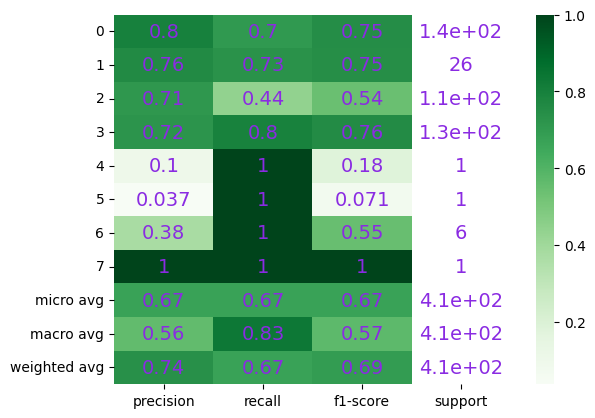

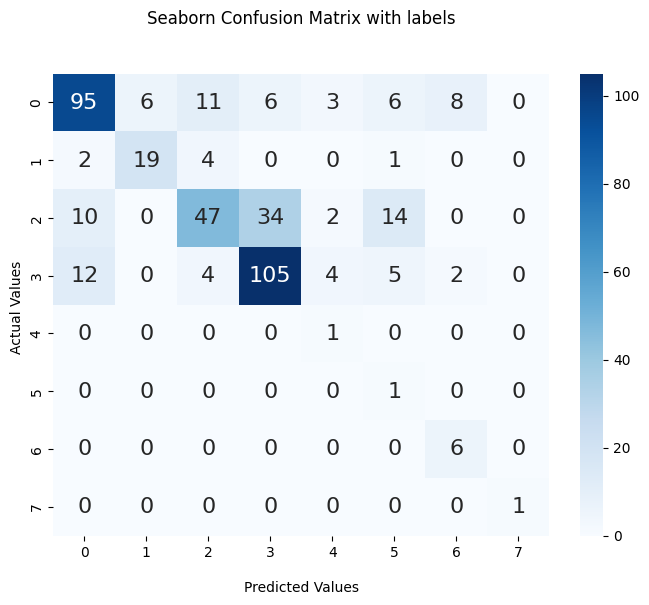

In [12]:
y_true_str = [str(_) for _ in df.y_true] + label_names
y_pred_str = [str(_) for _ in df.y_pred] + label_names

clf_report = classification_report(y_true_str,
                                   y_pred_str,
                                   labels=label_names,
                                   target_names=label_names,
                                   output_dict=True)

clf_report_df = pd.DataFrame(clf_report).iloc[:, :].T
clf_report_df["support"] = clf_report_df["support"].astype(int)

mask = np.zeros((11, 4))
mask[:,3] = True
sns.heatmap(clf_report_df, mask=mask, cmap="Greens")
sns.heatmap(clf_report_df, alpha=0, cbar=False, annot=True, annot_kws={"size": 14, "color":"blueviolet"})

plt.show()



cm = confusion_matrix(y_true_str, y_pred_str)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(label_names)
ax.yaxis.set_ticklabels(label_names)

# Display the visualization of the Confusion Matrix.
plt.show()

In [14]:
df_2_3 = df.loc[df["y_true"] == "2"]
df_2_3 = df_2_3.loc[df_2_3["y_pred"] == "3"]
gpt_comments = df_2_3[["y_text", "content"]]
for i in range(len(gpt_comments)):
    x = gpt_comments.iloc[i]
    print(x.content)
    print()
    print(x.y_text)
    print("\n\n\n\n\n")

Chân váy nảy chị bận size M nhiu kí

Đáp án: 3. Người bình luận đang hỏi về thông số sản phẩm, cụ thể là kích thước size M của chân váy nảy.






Màu nâu đó e

Đáp án: 3.
Giải thích: Người bình luận đang chọn màu sắc (nâu) cho sản phẩm, do đó đây là một trường hợp chọn thông số cho sản phẩm.






Chăn váy nảy bận size M nhiu kí vừa c ơi

Đáp án: 3. Người bình luận đang chọn thông số cho sản phẩm, cụ thể là hỏi về kích cỡ size M của chăn váy.






Chan vay da nâu size M nhiu kí

Đáp án: 3. Bình luận này đang chọn thông số cho sản phẩm bằng cách yêu cầu thông tin về kích thước và trọng lượng của sản phẩm ("size M nhiều kí"), do đó đáp án là 3.






Váy da nâu M nhiu kí

Đáp án: 3. Người bình luận đang hỏi về kích thước của váy da nâu kích thước M, do đó đây là một yêu cầu để chủ stream cung cấp thông tin về kích thước của sản phẩm.






Set hồng còn k ạ

Đáp án: 3. Bình luận này có ý muốn yêu cầu chủ livestream cung cấp thông số chi tiết về sản phẩm set hồng mà người bình luận quan 

In [15]:
df_0123 = df[df["y_pred"].isin(["0", "1", "2", "3"])]
df_0123 = df_0123[df_0123["y_true"].isin(["0", "1", "2", "3"])]
df_0123

,y_true,y_pred,y_text,content,category
0,0,0,Error occurred,Ahduifmf,others
1,0,0,"Đáp án: 0\nBình luận ""Gaieifngn"" không có ý ng...",Gaieifngn,others
3,0,0,"Đáp án: 0\nBình luận ""m"" không có đủ thông tin...",m,others
5,0,0,"Đáp án: 0. Không phân tích được vì ""Abdjifkg"" ...",Abdjifkg,others
6,0,0,Đáp án: 0. Bình luận không có ý nghĩa rõ ràng ...,Ạnkfkgg,others
...,...,...,...,...,...
45,3,3,Đáp án: 3. Người bình luận đang chọn thông số ...,Size M 210k,others
46,0,3,"Đáp án: 3.\nGiải thích: Bình luận chỉ ghi ""m"" ...",m,others
47,2,0,Error occurred,E có dc k ạ,others
48,3,3,"Đáp án: 3.\nGiải thích:\nBình luận ""2 sét l"" k...",2 sét l,others


In [16]:
y_true_str = [str(_) for _ in df_0123.y_true] + ["0", "1", "2", "3"]
y_pred_str = [str(_) for _ in df_0123.y_pred] + ["0", "1", "2", "3"]
clf_rp = classification_report(y_true_str, y_pred_str, target_names = ["0", "1", "2", "3"])
print(clf_rp)
cm = confusion_matrix(y_true_str, y_pred_str)
cm_df = pd.DataFrame(cm)
cm_df.columns = ["0", "1", "2", "3"]
name = "y_true"
cm_df[name] = ["0", "1", "2", "3"]
cm_df.set_index(name, inplace=True)
cm_df

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       118
           1       0.76      0.76      0.76        25
           2       0.71      0.52      0.60        91
           3       0.72      0.87      0.79       121

    accuracy                           0.75       355
   macro avg       0.75      0.74      0.74       355
weighted avg       0.75      0.75      0.74       355



,0,1,2,3
y_true,,,,
0,95,6,11,6
1,2,19,4,0
2,10,0,47,34
3,12,0,4,105
